In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import numpy as np

#### Plot ideas:

##### Graphics:

- Most common types of crime
- Crime rate (amount) reported overtime
- Most crime incidence by hour of the day

##### KPI's:

- Numbers of crimes (YTD)
- Most affected area overall


In [108]:
la_crime_data_henrique = pd.read_csv('/Users/henriquevaz/NOVA IMS/YEAR 1/SPRING SEMESTER/DV/Projects/Project 2/Data/LA_Crime_HV.csv')
population_data_henrique = pd.read_csv('/Users/henriquevaz/NOVA IMS/YEAR 1/SPRING SEMESTER/DV/Projects/Project 2/Data/Population_HV.csv')        

In [26]:
la_crime_data

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Part 1-2,Crime Code,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Cross Street,LAT,LON,Year,Month
0,0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,2,900,...,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010,2
1,1,11401303,2010-09-13,2010-09-12,45,14,Pacific,1485,2,740,...,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010,9
2,2,70309629,2010-08-09,2010-08-09,1515,13,Newton,1324,2,946,...,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010,8
3,3,90631215,2010-01-05,2010-01-05,150,6,Hollywood,646,2,900,...,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010,1
4,4,100100501,2010-01-03,2010-01-02,2100,1,Central,176,1,122,...,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116887,2116887,190608903,2019-03-28,2019-03-28,400,6,Hollywood,644,1,648,...,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,2019,3
2116888,2116888,190715222,2019-08-15,2019-08-14,1810,7,Wilshire,701,1,331,...,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732,2019,8
2116889,2116889,192004409,2019-01-06,2019-01-06,2100,20,Olympic,2029,2,930,...,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,2019,1
2116890,2116890,191716777,2019-10-17,2019-10-16,1800,17,Devonshire,1795,1,420,...,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085,2019,10


In [28]:
top_10_most_occured = pd.DataFrame(la_crime_data.groupby('Crime Code Description')['DR Number'].nunique())
top_10_most_occured.rename(columns={'DR Number' : 'Count'}, inplace=True)
top_10_most_occured = top_10_most_occured.sort_values(by='Count', ascending=False)
top_10_most_occured.iloc[:10, :]

,Count
Crime Code Description,
BATTERY - SIMPLE ASSAULT,190537
BURGLARY FROM VEHICLE,162174
VEHICLE - STOLEN,159881
THEFT PLAIN - PETTY ($950 & UNDER),149858
BURGLARY,147695
THEFT OF IDENTITY,127806
INTIMATE PARTNER - SIMPLE ASSAULT,114550
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",109448
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",92717


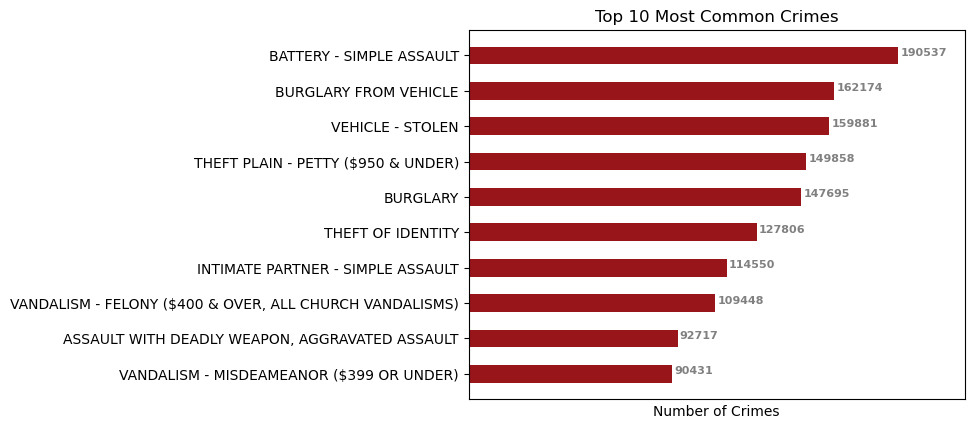

In [74]:
#plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
data = top_10_most_occured.iloc[:10, :]
crime = list(data.index)
y_pos = np.arange(len(crime))
count = data['Count']
error = np.random.rand(len(crime))

ax.barh(y_pos, count, color='#98151a', height=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(crime)
ax.set_xticks([])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crimes')
ax.set_title('Top 10 Most Common Crimes')
_, xmax = plt.xlim()
plt.xlim(0, xmax+20000)
for i, v in enumerate(count):
    ax.text(v + 1000, i, str(v), color='grey', fontweight='bold', fontsize=8)

plt.show()

In [147]:
def barchart(data, year, area):
    # Filter the whole dataset for the current year and area selection
    la_crime_data_bar = data[(data['Year'] == year) & (data['Area Name'] == area)]
    
    # Create a df with the top 10 most common types of crimes
    top_10_most_occured = pd.DataFrame(la_crime_data_bar.groupby('Crime Code Description')['DR Number'].nunique())
    top_10_most_occured.rename(columns={'DR Number' : 'Count'}, inplace=True)
    top_10_most_occured = top_10_most_occured.sort_values(by='Count', ascending=False)
    top_10_most_occured.iloc[:10, :]
    
    # Plot it
    fig, ax = plt.subplots()

    data = top_10_most_occured.iloc[:10, :]
    crime = list(data.index)
    y_pos = np.arange(len(crime))
    count = data['Count']
    error = np.random.rand(len(crime))

    ax.barh(y_pos, count, color='#98151a', height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(crime)
    ax.set_xticks([])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Number of Crimes')
    ax.set_title('Top 10 Most Common Crimes')
    plt.box(False)
    # Add the labels to the bars
    for i, v in enumerate(count): 
        ax.text(v, i, str(v), color='grey', fontweight='bold', fontsize=8)

    plt.show()

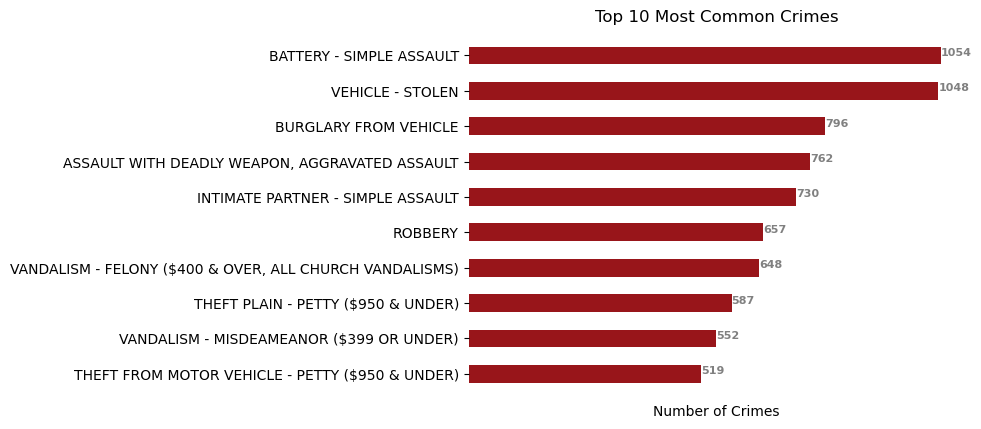

In [148]:
barchart(la_crime_data_henrique, 2019, 'Newton')

In [150]:
def crimes_occured_delta(data, year, area):
    # Define the variables
    crimes_occur_selected = data[(la_crime_data['Year'] == year) & (data['Area Name'] == area)]['Date Occurred'].count()
    crimes_occur_bf_selected = data[(la_crime_data['Year'] == year-1) & (data['Area Name'] == area)]['Date Occurred'].count()
    
    # Plot it
    import plotly.graph_objects as go
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = crimes_occur_selected,
        number={"font":{"size":40}}
        ))


    fig.update_layout(
        template = {'data' : {'indicator': [{
            'title': {'text': "Number of Occured Crimes"},
            'delta' : {'reference': crimes_occur_bf_selected,
                      'decreasing.color' : 'green',
                      'increasing.color' : 'red'}}]
                             }})
    return fig

In [151]:
crimes_occured_delta(la_crime_data_henrique, 2019, 'Newton')

In [152]:
def most_affected_area(data, year):
    # Apply the year filter
    data_selection = data[data['Year'] == year]
    
    # Define dataframe for this plot
    areas_affected = pd.DataFrame(data_selection.groupby('Area Name', as_index=False)['DR Number'].nunique().sort_values('DR Number', ascending=False))
    
    # Define variables
    most_affected_area = areas_affected['Area Name'].iloc[0]
    crimes_occured_most = areas_affected['DR Number'].iloc[0]
    
    # Plot it
    import plotly.graph_objects as go
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number",
        value = crimes_occured_most,
        number={"font":{"size":40}},
        title = {"text": f"Most Affected Area<br><br><span style='font-size:1.8em;color:gray'>{most_affected_area}</span>"}
    ))
    
    return fig    

In [153]:
most_affected_area(la_crime_data_henrique, 2019)

In [154]:
def least_affected_area(data, year):
    # Apply the year filter
    data_selection = data[data['Year'] == year]
    
    # Define dataframe for this plot
    areas_affected = pd.DataFrame(data_selection.groupby('Area Name', as_index=False)['DR Number'].nunique().sort_values('DR Number', ascending=False))
    
    # Define variables
    least_affected_area = areas_affected['Area Name'].iloc[-1]
    crimes_occured_least = areas_affected['DR Number'].iloc[-1]
    
    # Plot it
    import plotly.graph_objects as go
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number",
        value = crimes_occured_least,
        number={"font":{"size":40}},
        title = {"text": f"Least Affected Area<br><br><span style='font-size:1.8em;color:gray'>{least_affected_area}</span>"}
    ))
    
    return fig

In [155]:
least_affected_area(la_crime_data_henrique, 2019)

In [156]:
def most_affected_year(data, area):
    # Apply the year filter
    data_selection = data[data['Area Name'] == area]
    
    # Define dataframe for this plot
    years_affected = pd.DataFrame(data_selection.groupby('Year', as_index=False)['DR Number'].nunique().sort_values('DR Number', ascending=False))
    
    # Define variables
    most_affected_year = years_affected['Year'].iloc[0]
    crimes_occured_most_year = years_affected['DR Number'].iloc[0]
    
    # Plot it
    import plotly.graph_objects as go
    fig = go.Figure()
    
    fig.add_trace(go.Indicator(
        mode = "number",
        value = int(crimes_occured_most_year),
        number={"font":{"size":40}},
        title = {"text": f"Most Affected Year<br><br><span style='font-size:1.8em;color:gray'>{most_affected_year}</span>"}
        ))
    
    return fig

In [157]:
most_affected_year(la_crime_data_henrique, 'Newton')

In [158]:
def population_percentage(data, area):
    # Get the numeric value of population
    selected_area_popu = data[data['Area name']==area].iloc[0, 1]
    
    # Get the corresponding percentage
    selected_area_percent_popu = data[data['Area name']==area].iloc[0, -1]
    
    # Plot it
    import plotly.graph_objects as go
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number",
        value = int(selected_area_popu),
        number={"font":{"size":40}},
        domain = {'row': 0, 'column': 1},
        title = {"text": f"Total Population<br><br><span style='font-size:1.8em;color:gray'>{selected_area_percent_popu}</span><br>"}
        ))
    
    return fig

In [162]:
population_percentage(population_data_henrique, 'Central')